# A synchronized quorum of genetic clocks
Reimplemented model of a synchronized quorum of genetic clocks in bulk and in a 1D model. The reference is found here: https://www.nature.com/articles/nature08753

## Bulk reaction model
The bulk reaction model has two compartments that separate AHL inside ($H_i$) and outside ($H_e$) the cell. Degradation ($\gamma$) only occurs inside the cell, but flow of fluid ($\mu$) removes external AHL.

\begin{equation}
\frac{dA}{dt}=C_A[1-(d/d_0)^4]P(\alpha-\tau)-\frac{\gamma_AA}{1+f(A+I)}\\
\end{equation}
\begin{equation}
\frac{dI}{dt}=C_I[1-(d/d_0)^4]P(\alpha-\tau)-\frac{\gamma_II}{1+f(A+I)}\\
\end{equation}
\begin{equation}
\frac{dH_i}{dt}=\frac{bI}{1+kI}-\frac{\gamma_HAH_i}{1+gA}+D(H_e-H_i)\\
\end{equation}
\begin{equation}
\frac{dH_e}{dt}=\frac{-d}{1-d}D(H_e-H_i)-\mu H_e\\
\end{equation}

Expression of genes follow a delayed Hill function ($P$), where $H_\tau$ is the $H_e$ at time $t-\tau$.

\begin{equation}
P(\alpha-\tau)=\frac{\delta+\alpha{H_\tau}^2}{1+k_1{H_\tau}^2}
\end{equation}

## Numerical integration

In [1]:
#Import packages.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Parameters from reference (supplementary).
#Units are in um, s (or mins?), no mentioned units for concentration.
Ca=1 #Constant factor of aiiA production (1)
Ci=4 #Constant factor of luxI production (4)
delta=10**(-3) #Leaky expression (10**(-3))
alpha=25 #Rate constant of gene expression (2500)
tau=2000 #Time delay of expression (?)
k=1 #Negative feedback of AHL production (1)
k1=0.1 #Negative feedback of gene expression (0.1)
b=0.06 #Rate constant of AHL production (0.06)
gammaA=15 #Degradation rate of aiiA (15)
gammaI=24 #Degradation rate of luxI (24)
gammaH=0.01 #Degradation rate of internal AHL (0.01)
f=0.3 #Negative feedback of degradation of proteins (0.3)
g=0.01 #Negative feedback of degradation of AHL (0.01)
d0=0.88 #Initial cell density? (0.88)
d=0.5 #Cell density (0.5)
D=0.025 #Diffusion of AHL through the cell membrane (2.5)
mu=1 #Wash rate of external AHL (2)

In [3]:
#ODE functions
def dA(Ca,d0,gammaA,f,delayc,He,Hi,Ic,Ac):
    return Ca*(1-(d/d0)**4)*hill(delta,alpha,k1,delayc)-(gammaA*Ac)/(1+f*(Ac+Ic))
def dI(Ci,d0,gammaI,f,delayc,He,Hi,Ic,Ac):
    return Ci*(1-(d/d0)**4)*hill(delta,alpha,k1,delayc)-(gammaI*Ic)/(1+f*(Ac+Ic))
def dHi(b,k,gammaH,g,D,Hec,Hic,Ic,Ac):
    return ((b*Ic)/(1+k*Ic))-((gammaH*Ac*Hic)/(1+g*Ac))+D*(Hec-Hic)
def dHe(d,D,mu,Hec,Hic,He):
    return (-(d/(1-d))*D*(Hec-Hic))-(mu*Hec)
def hill(delta,alpha,k1,delayc):
    return (delta+alpha*(delayc**2))/(1+k1*(delayc**2))

In [4]:
#Trajectory function.
def trajectory(init,maxt,dt):
    A=[init[0]]
    I=[init[1]]
    Hi=[init[2]]
    He=[init[3]]
    time=[0]
    for i in range(int(maxt/dt)):
        Ac=A[-1]
        Ic=I[-1]
        Hic=Hi[-1]
        Hec=He[-1]
        if i-tau<=0:
            delayc=Hi[0]
        else:
            delayc=Hi[int(i-tau)]
        A.append(Ac+dt*dA(Ca,d0,gammaI,f,delayc,He,Hi,Ic,Ac))
        I.append(Ic+dt*dI(Ci,d0,gammaA,f,delayc,He,Hi,Ic,Ac))
        Hi.append(Hic+dt*dHi(b,k,gammaH,g,D,Hec,Hic,Ic,Ac))
        He.append(Hec+dt*dHe(d,D,mu,Hec,Hic,He))
        time.append(i*dt)
    return A,I,Hi,He,time

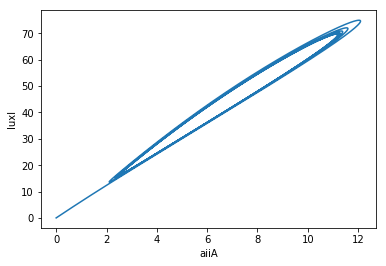

In [5]:
#Phase portrait.
init=[0,0,0.1,0] #A,I,Hi,He
maxt=200
dt=0.001
A,I,Hi,He,time=trajectory(init,maxt,dt)
plt.plot(A,I)
plt.xlabel('aiiA')
plt.ylabel('luxI')
plt.show()

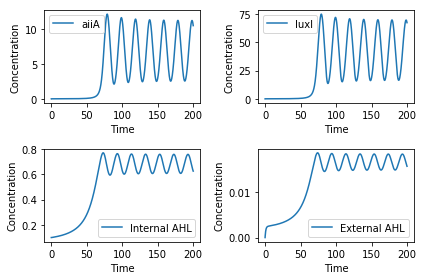

In [6]:
#Time series.
plt.subplot(2,2,1)
plt.plot(time,A,label='aiiA')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2,2,2)
plt.plot(time,I,label='luxI')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2,2,3)
plt.plot(time,Hi,label='Internal AHL')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2,2,4)
plt.plot(time,He,label='External AHL')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.tight_layout()
plt.legend()
plt.show()

# 1D numerical model

In [265]:
#Import packages.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [440]:
#Parameters from reference (supplementary).
#Units are in um, s (or mins?), no mentioned units for concentration.
Ca=1 #Constant factor of aiiA production (1)
Ci=4 #Constant factor of luxI production (4)
delta=10**(-3) #Leaky expression (10**(-3))
alpha=2500 #Rate constant of gene expression (2500)
tau=2000 #Time delay of expression (?)
k=1 #Negative feedback of AHL production (1)
k1=0.1 #Negative feedback of gene expression (0.1)
b=0.06 #Rate constant of AHL production (0.06)
gammaA=15 #Degradation rate of aiiA (15)
gammaI=24 #Degradation rate of luxI (24)
gammaH=0.01 #Degradation rate of internal AHL (0.01)
f=0.3 #Negative feedback of degradation of proteins (0.3)
g=0.01 #Negative feedback of degradation of AHL (0.01)
d0=0.88 #Initial cell density? (0.88)
d=0.5 #Cell density (0.5)
D=2.5 #Diffusion of AHL through the cell membrane (2.5)
mu=0 #Wash rate of external AHL (2)
D1=1 #Diffusion rate constant

In [298]:
#ODE functions including diffusion term.
def dA(Ca,d0,gammaA,f,delayc,He,Hi,Ic,Ac):
    return Ca*(1-(d/d0)**4)*hill(delta,alpha,k1,delayc)-(gammaA*Ac)/(1+f*(Ac+Ic))
def dI(Ci,d0,gammaI,f,delayc,He,Hi,Ic,Ac):
    return Ci*(1-(d/d0)**4)*hill(delta,alpha,k1,delayc)-(gammaI*Ic)/(1+f*(Ac+Ic))
def dHi(b,k,gammaH,g,D,Hec,Hic,Ic,Ac):
    return ((b*Ic)/(1+k*Ic))-((gammaH*Ac*Hic)/(1+g*Ac))+D*(Hec-Hic)
def dHe(d,D,mu,Hec,Hic,He,D1):
    return (-(d/(1-d))*D*(Hec-Hic))-(mu*Hec)+(D1*diffoperator(D1,He))
def hill(delta,alpha,k1,delayc):
    return (delta+alpha*(delayc**2))/(1+k1*(delayc**2))
def diffoperator(D1,He):
    return D1*((He[0][2:]-He[0][1:-1])+(He[0][0:-2]-He[0][1:-1]))/(dx**2)

In [441]:
#Initialize 1D array
size=30
dx=1
#Time steps
maxt=100
dt=0.01
#1D array 
A=np.zeros((1,size))
I=np.zeros((1,size))
Hi=np.zeros((1,size))
He=np.zeros((1,size))
#Initial conditions
Hi[0][int(size/2)]=0.1

In [442]:
from progressbar import ProgressBar
pbar=ProgressBar()

Af=A
If=I
Hif=Hi
Hef=He
for i in pbar(range(int(maxt/dt))):
    Ac=A[0][1:-1]
    Ic=I[0][1:-1]
    Hic=Hi[0][1:-1]
    Hec=He[0][1:-1]
    if i-tau<=0:
        delayc=Hic
    else:
        delayc=Hif[int(i-tau)][1:-1]
    A[0][1:-1]=Ac+dt*dA(Ca,d0,gammaI,f,delayc,He,Hi,Ic,Ac)
    I[0][1:-1]=Ic+dt*dI(Ci,d0,gammaA,f,delayc,He,Hi,Ic,Ac)
    Hi[0][1:-1]=Hic+dt*dHi(b,k,gammaH,g,D,Hec,Hic,Ic,Ac)
    He[0][1:-1]=Hec+dt*dHe(d,D,mu,Hec,Hic,He,D1)
    A[0][0],A[0][-1]=A[0][1],A[0][-2]
    I[0][0],I[0][-1]=I[0][1],I[0][-2]
    Hi[0][0],Hi[0][-1]=Hi[0][1],Hi[0][-2]
    He[0][0],He[0][-1]=He[0][1],He[0][-2]
    Af=np.append(Af,A,axis=0)
    If=np.append(If,I,axis=0)
    Hif=np.append(Hif,Hi,axis=0)
    Hef=np.append(Hef,He,axis=0)

100% (10000 of 10000) |###################| Elapsed Time: 0:00:12 Time: 0:00:12


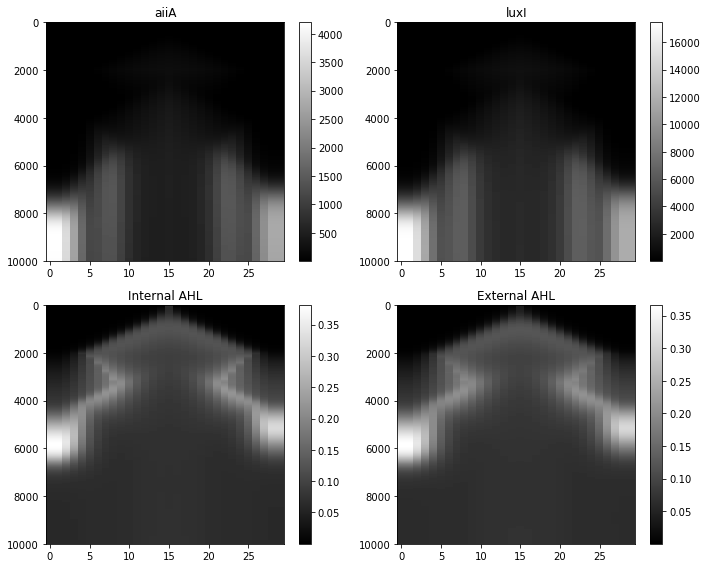

In [443]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(Af,cmap='gray', interpolation='nearest',aspect='auto')
plt.title('aiiA')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(If,cmap='gray', interpolation='nearest',aspect='auto')
plt.title('luxI')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(Hif,cmap='gray', interpolation='nearest',aspect='auto')
plt.title('Internal AHL')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(Hef,cmap='gray', interpolation='nearest',aspect='auto')
plt.title('External AHL')
plt.colorbar()
plt.tight_layout()
plt.show()